In [1]:
# NBA General Managers need to be smart, decisive, and know their stats! A team's chance to winning a championshiop
# lies in the ability to choose the right players. This means presenting the right stats and choosing the right models. 
# This jupyter notebook analyzes insights and data from past seasons of the Boston Celtics (my favorite team) 
#and their all-time players

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
celtstats = pd.read_csv("CeltStats.csv")

In [4]:
celtstats.columns

Index(['Season', 'Lg', 'Tm', 'W', 'L', 'Finish', 'Age', 'Ht.', 'Wt.', 'G',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')

In [5]:
celtstats[celtstats['PTS']==celtstats['PTS'].max()]

,Season,Lg,Tm,W,L,Finish,Age,Ht.,Wt.,G,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
58,1961-62,NBA,BOS,60,20,1,27.9,5-Jun,203.0,80,...,0.728,NaN,NaN,6080.0,2049,NaN,NaN,NaN,1909,9687


In [6]:
print("9687 is the highest PTS in the Boston Celtics Franchise in year 1961-62")

9687 is the highest PTS in the Boston Celtics Franchise in year 1961-62


Let's graph all the points throughout the history.

In [7]:
points = celtstats[['Season', 'PTS']]


In [8]:
points

,Season,PTS
0,2019-20,7232
1,2018-19,9216
2,2017-18,8529
3,2016-17,8857
4,2015-16,8669
...,...,...
69,1950-51,5881
70,1949-50,5420
71,1948-49,4593
72,1947-48,3303


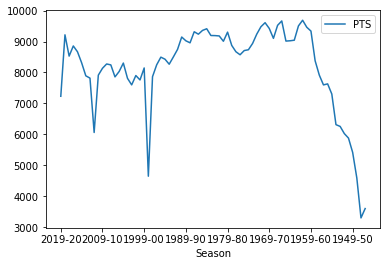

In [9]:
points
ax = plt.gca()
points.plot(kind='line',x='Season',y='PTS',ax=ax)

plt.show()

Let's bring in the player stats. The CSV dataset apparently has ranks. Let's look at that

In [20]:
PlayerStats = pd.read_csv("PlayerStat.csv")
PlayerStats

,Rk,Player,From,To,Yrs,G,MP,FG,FGA,3P,...,TOV,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1
0,1,Alaa Abdelnaby\abdelal01,1993,1994,2,76.0,1311.0,243.0,472.0,0.0,...,101.0,185.0,578.0,0.515,NaN,0.736,17.3,7.6,4.6,0.3
1,2,Zaid Abdul-Aziz\abdulza01,1978,1978,1,2.0,24.0,3.0,13.0,NaN,...,3.0,4.0,8.0,0.231,NaN,0.667,12.0,4.0,7.5,1.5
2,3,Mark Acres\acresma01,1988,1989,2,141.0,1783.0,163.0,317.0,1.0,...,77.0,292.0,424.0,0.514,1.000,0.610,12.6,3.0,3.0,0.4
3,4,Danny Ainge\aingeda01,1982,1989,8,556.0,15603.0,2537.0,5210.0,348.0,...,875.0,1420.0,6257.0,0.487,0.386,0.867,28.1,11.3,2.8,4.4
4,5,Kadeem Allen\allenka01,2018,2018,1,18.0,107.0,6.0,22.0,0.0,...,9.0,15.0,19.0,0.273,0.000,0.778,5.9,1.1,0.6,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,471,Brandan Wright\wrighbr03,2015,2015,1,8.0,86.0,12.0,21.0,0.0,...,5.0,4.0,26.0,0.571,NaN,0.500,10.8,3.3,2.1,1.0
471,472,A.J. Wynder\wyndeaj01,1991,1991,1,6.0,39.0,3.0,12.0,0.0,...,4.0,1.0,12.0,0.250,0.000,0.750,6.5,2.0,0.5,1.3
472,473,Guerschon Yabusele\yabusgu01,2018,2019,2,74.0,486.0,61.0,138.0,21.0,...,27.0,55.0,173.0,0.442,0.323,0.682,6.6,2.3,1.4,0.4
473,474,James Young\youngja01,2015,2017,3,89.0,751.0,72.0,196.0,35.0,...,14.0,54.0,202.0,0.367,0.276,0.548,8.4,2.3,1.1,0.3


In [21]:
PlayerStats.columns

Index(['Rk', 'Player', 'From', 'To', 'Yrs', 'G', 'MP', 'FG', 'FGA', '3P',
       '3PA', 'FT', 'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'FG%', '3P%', 'FT%', 'MP.1', 'PTS.1', 'TRB.1', 'AST.1'],
      dtype='object')

Since the 3 point line was itnrdocude in the 80s. I think it's fair to say that we can't use 3 pointers to evaulate all teh franchise players. Let's see who got the highest Rebounds

In [24]:
HighRebound = PlayerStats[PlayerStats['TRB']==PlayerStats['TRB'].max()]
HighRebound

,Rk,Player,From,To,Yrs,G,MP,FG,FGA,3P,...,TOV,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1
358,359,Bill Russell\russebi01,1957,1969,13,963.0,40726.0,5687.0,12930.0,NaN,...,NaN,2592.0,14522.0,0.44,NaN,0.561,42.3,15.1,22.5,4.3


Bill Russell....kinda expected that :)

Who had the highest assists (all time)

In [25]:
HighAssist = PlayerStats[PlayerStats['AST']==PlayerStats['AST'].max()]
HighAssist

,Rk,Player,From,To,Yrs,G,MP,FG,FGA,3P,...,TOV,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1
88,89,Bob Cousy\cousybo01,1951,1963,13,917.0,30131.0,6167.0,16465.0,NaN,...,NaN,2231.0,16955.0,0.375,NaN,0.803,35.5,18.5,5.2,7.6


Also expected Cousy to rank that. 